# COMP5318 - Machine Learning and Data Mining 

## Tutorial 3 - Linear regression and Gradient Decent

**Semester 2, 2019**

**Objectives:**
* To learn how to build a linear regression model from scratch
* To learn about Gradient decent
* To learn how to use pandas and numpy to preprocess data.

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab3.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab3.ipynb" file
* Complete exercises in "lab3.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Nguyen Hoang Tran 

Tutors: Fengxiang He, Shaojun Zhang, Fangzhou Shi, Yang Lin, Iwan Budiman, Zhiyi Wang, Canh Dinh, Yixuan Zhang, Rui Dong, Haoyu He, Dai Hoang Tran

## 1. House Prices Dataset
**Dataset descriptions:**
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("./data/Lab3"))

['data_description.txt', 'test.csv', 'train.csv']


In [91]:
#Load the libraries and data...
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = pd.read_csv('./data/Lab3/train.csv')
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### In this tutorial we only consider one feature the Living Area to predict the Sale Price with the expectation that the Price will increase when the Living Area increases.
However we can use more features like the number of bedroom....

In [92]:
newData = data[['GrLivArea','SalePrice']]
print(newData.head())

   GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000


Plot the dataset on firgure

1515.463698630137
-1.5611560750379769e-16


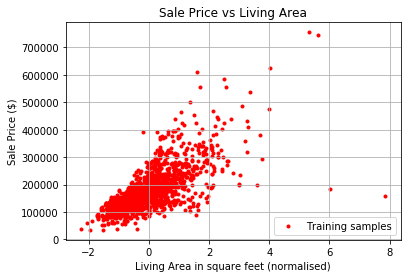

In [93]:
import matplotlib.pylab as pl
%matplotlib inline
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...

x = newData['GrLivArea']
y = newData['SalePrice']
print(np.mean(x))
# Todo: Normalize feature X:
x = ((x - np.mean(x))/np.std(x))
print(np.mean(x))
x = np.c_[np.ones(x.shape[0]), x] 
pl.scatter(x[:,1], y,marker='.', color = 'r', label = 'Training samples')
pl.xlabel('Living Area in square feet (normalised)')
pl.ylabel('Sale Price ($)')
pl.legend(loc='lower right')
plt.title('Sale Price vs Living Area')
pl.grid()
pl.show()

### 2. Building Linear Regression model using Gradient Decent with sum square error

#### 2.1 Linear Model:
* input: $x \in R^D$ (covariates, predictors, features, etc)
* Output: $y \in R$ (responses, targets, outcomes, outputs, etc)
* Model: $f: x \to y$,with $f(x)=w_0+ \
\sum_{d=1}^{D}w_dx_d =w_0+w^T x.$

Minimize the Residual sum of squares:
$ RSS(w) = \sum_{n=1}^{N}[y_n-f(x_n)]^2 =  \sum_{n=1}^{N}[y_n- (w_0 + \sum_{d=1}^{D}w_dx_{nd}) ]^2 .$

#### 2.2 Gradient decent:
* Initialize $w =  w^{(0)}$ randomly:
* Choose learning rate $ \eta> 0$
*  Loop until convergence:

    Compute Gradient: $\nabla RSS(w) = X^T(Xw^t-y)$
    
    Update parameters: $w^{t+1} = w^t - \eta * \nabla RSS(w)$

In [94]:
#GRADIENT DESCENT
def gradient_descent(x, y, w, iterations, eta):
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        loss = 1/(2*n) * np.dot(error.T, error)
        past_loss.append(loss)
        
        # Todo : Caculate Residual sum of squares error following notation on 2.1
        GradRss = np.dot(x.T,error)
        # Todo: Cacualte new weight update.
        w = w - eta* GradRss/n
        past_w.append(w)
        print(w)
        
    return past_w, past_loss

In [95]:
#Pass the relevant variables to the function and get the new values back...
eta = 0.01 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
w0 = np.random.rand(2) #Pick some random values to start with
past_w, past_loss = gradient_descent(x, y, w0, iterations, eta)

[1809.9014634   563.03947521]
[3601.01440767 1120.16527773]
[5374.2162225  1671.71982223]
[7129.68601917 2217.75882128]
[8867.60111789 2758.33743034]
[10588.13706561  3293.51025331]
[12291.46765386  3823.33134805]
[13977.76493623  4347.85423184]
[15647.19924577  4867.13188679]
[17299.93921221  5381.2167652 ]
[18936.151779    5890.16079482]
[20556.00222011  6394.01538414]
[22159.65415681  6892.83142757]
[23747.26957415  7386.65931057]
[25319.00883731  7875.54891473]
[26875.03070784  8359.54962286]
[28415.49235967  8838.7103239 ]
[29940.54939498  9313.07941794]
[31450.35585993  9782.70482103]
[32945.06426023 10247.63397009]
[34424.82557654 10707.91382766]
[35889.78927968 11163.59088666]
[37340.10334578 11614.71117506]
[38775.91427123 12061.32026058]
[40197.36708742 12503.46325525]
[41604.60537545 12941.18481997]
[42997.7712806  13374.52916904]
[44377.0055267  13803.54007462]
[45742.44743034 14228.26087115]
[47094.23491494 14648.73445971]
[48432.50452469 15065.00331239]
[49757.39143835 15

[177068.47712016  55077.23129302]
[177107.00430786  55089.21517736]
[177145.14622368  55101.07922286]
[177182.90672035  55112.8246279 ]
[177220.28961205  55124.4525789 ]
[177257.29867484  55135.96425038]
[177293.93764699  55147.36080515]
[177330.21022943  55158.64339437]
[177366.12008604  55169.8131577 ]
[177401.67084408  55180.87122339]
[177436.86609454  55191.81870843]
[177471.7093925   55202.65671862]
[177506.20425748  55213.3863487 ]
[177540.35417381  55224.00868249]
[177574.16259098  55234.52479294]
[177607.63292397  55244.93574228]
[177640.76855363  55255.24258213]
[177673.572827    55265.44635358]
[177706.04905764  55275.54808732]
[177738.20052596  55285.54880372]
[177770.03047961  55295.44951295]
[177801.54213372  55305.25121509]
[177832.73867128  55314.95490022]
[177863.62324348  55324.56154849]
[177894.19896994  55334.07213027]
[177924.46893915  55343.48760624]
[177954.43620866  55352.80892745]
[177984.10380548  55362.03703545]
[178013.47472633  55371.17286237]
[178042.551937

[180858.01846856  56255.96838588]
[180858.65024278  56256.16489929]
[180859.27569926  56256.35944757]
[180859.89490117  56256.55205037]
[180860.50791106  56256.74272714]
[180861.11479086  56256.93149714]
[180861.71560185  56257.11837944]
[180862.31040474  56257.30339292]
[180862.89925959  56257.48655626]
[180863.4822259   56257.66788797]
[180864.05936255  56257.84740636]
[180864.63072783  56258.02512957]
[180865.19637945  56258.20107555]
[180865.75637456  56258.37526206]
[180866.31076972  56258.54770672]
[180866.85962093  56258.71842692]
[180867.40298362  56258.88743992]
[180867.94091269  56259.0547628 ]
[180868.47346247  56259.22041244]
[180869.00068675  56259.38440559]
[180869.52263878  56259.54675881]
[180870.0393713   56259.70748849]
[180870.55093649  56259.86661088]
[180871.05738603  56260.02414204]
[180871.55877107  56260.18009789]
[180872.05514227  56260.33449419]
[180872.54654975  56260.48734652]
[180873.03304315  56260.63867032]
[180873.51467163  56260.78848089]
[180873.991483

[180919.73788252  56275.16621377]
[180919.7524626  56275.1707489]
[180919.76689688  56275.17523869]
[180919.78118682  56275.17968357]
[180919.79533385  56275.18408401]
[180919.80933942  56275.18844044]
[180919.82320493  56275.19275331]
[180919.83693178  56275.19702305]
[180919.85052137  56275.20125009]
[180919.86397506  56275.20543486]
[180919.87729421  56275.20957778]
[180919.89048017  56275.21367928]
[180919.90353428  56275.21773976]
[180919.91645784  56275.22175963]
[180919.92925216  56275.22573931]
[180919.94191855  56275.22967919]
[180919.95445827  56275.23357967]
[180919.96687259  56275.23744114]
[180919.97916276  56275.241264  ]
[180919.99133004  56275.24504864]
[180920.00337565  56275.24879542]
[180920.01530079  56275.25250474]
[180920.02710669  56275.25617697]
[180920.03879453  56275.25981247]
[180920.05036549  56275.26341162]
[180920.06182073  56275.26697477]
[180920.07316143  56275.2705023 ]
[180920.08438872  56275.27399454]
[180920.09550374  56275.27745187]
[180920.1065076 

[180921.16356838  56275.60967345]
[180921.1638916   56275.60977399]
[180921.16421159  56275.60987352]
[180921.16452838  56275.60997206]
[180921.164842    56275.61006961]
[180921.16515248  56275.61016619]
[180921.16545986  56275.6102618 ]
[180921.16576417  56275.61035645]
[180921.16606543  56275.61045016]
[180921.16636368  56275.61054293]
[180921.16665895  56275.61063477]
[180921.16695126  56275.6107257 ]
[180921.16724065  56275.61081571]
[180921.16752715  56275.61090483]
[180921.16781078  56275.61099305]
[180921.16809158  56275.61108039]
[180921.16836957  56275.61116686]
[180921.16864478  56275.61125246]
[180921.16891723  56275.61133721]
[180921.16918696  56275.61142111]
[180921.169454    56275.61150417]
[180921.16971836  56275.6115864 ]
[180921.16998008  56275.61166781]
[180921.17023919  56275.61174841]
[180921.1704957   56275.61182819]
[180921.17074965  56275.61190718]
[180921.17100105  56275.61198538]
[180921.17124995  56275.6120628 ]
[180921.17149635  56275.61213945]
[180921.171740

[180921.19522923  56275.61952156]
[180921.19523584  56275.61952362]
[180921.19524239  56275.61952565]
[180921.19524887  56275.61952767]
[180921.19525529  56275.61952967]
[180921.19526164  56275.61953164]
[180921.19526792  56275.6195336 ]
[180921.19527415  56275.61953553]
[180921.19528031  56275.61953745]
[180921.19528641  56275.61953935]
[180921.19529245  56275.61954123]
[180921.19529843  56275.61954309]
[180921.19530435  56275.61954493]
[180921.19531021  56275.61954675]
[180921.19531601  56275.61954855]
[180921.19532176  56275.61955034]
[180921.19532745  56275.61955211]
[180921.19533307  56275.61955386]
[180921.19533865  56275.6195556 ]
[180921.19534417  56275.61955731]
[180921.19534963  56275.61955901]
[180921.19535504  56275.61956069]
[180921.19536039  56275.61956236]
[180921.19536569  56275.61956401]
[180921.19537094  56275.61956564]
[180921.19537613  56275.61956725]
[180921.19538127  56275.61956885]
[180921.19538637  56275.61957044]
[180921.19539141  56275.61957201]
[180921.195396

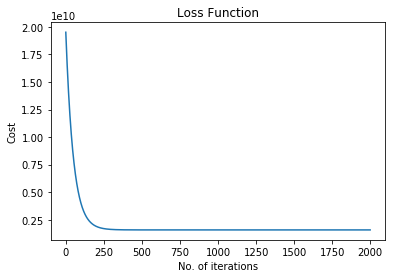

In [96]:
#Plot the cost function...
plt.title('Loss Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_loss)
plt.show()

In [89]:
print(past_w[-1])

[nan nan]


### 3. The changing of model through each interation

In [ ]:
#Animation
#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_w[i][1]*x + past_w[i][0]
    line.set_data(x, y)
    annotation.set_text('loss = %.2f e10' % (past_loss[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

In [ ]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### 4: Using more features to predict the house price.

In [81]:
#For example using LotFrontage, and GrLivArea
dataNew = data[["GrLivArea","LotFrontage",'SalePrice']]

#remove null value
dataNew = dataNew[dataNew['GrLivArea'].notnull()]
dataNew = dataNew[dataNew['LotFrontage'].notnull()]

x = dataNew[["GrLivArea","LotFrontage"]]
y = dataNew['SalePrice']

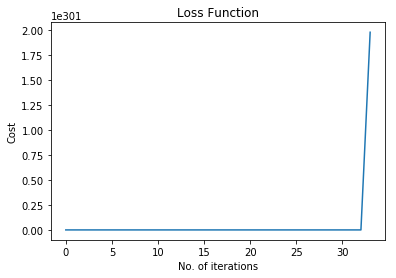

In [85]:
#Todo: 
    
#GRADIENT DESCENT
def gradient_descent(x, y, w, iterations, eta):
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        loss = 1/(2*n) * np.dot(error.T, error)
        past_loss.append(loss)
        
        # Todo : Caculate Residual sum of squares error following notation on 2.1
        GradRss = np.dot(x.T,error)
        # Todo: Cacualte new weight update.
        w = w + eta* GradRss/n
        past_w.append(w)
        
    return past_w, past_loss

#Pass the relevant variables to the function and get the new values back...
eta = 0.01 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
w0 = np.random.rand(2) #Pick some random values to start with
past_w, past_loss = gradient_descent(x, y, w0, iterations, eta)

#Plot the cost function...
plt.title('Loss Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_loss)
plt.show()